# 탄소중립을 위한 기후기술 정보 시각화
### (Visualizationof Climate Technology Information for Carbon Neutrality)
## 1. 소개
### 기후기술이란?
**탄소중립 달성**을 위해 온실가스를 감축하고 기후변화에 적응하기 위한 기술을 의미합니다.  
해당 프로젝트에서는, 기후기술과 관련하여 다양한 정보를 수집하고 시각화를 해본 프로젝트입니다.  

### [기후기술 분류 체계](https://www.ctis.re.kr/ko/techClass/classification.do?key=1141)
기후기술은 **감축**, **적응**, **융복합**의 3개 분야의 45개 기술분류로 구분되어 활용되고 있습니다.

In [375]:
sys_type = pd.read_html("https://www.ctis.re.kr/ko/techClass/classification.do?key=1141")
sys_type = sys_type[0]
sys_type.columns = ["대분류", "중분류", "중분류1", "중분류2", "분야", "소분류"]
sys_type["중분류"][20:] = sys_type["중분류"][20:].str.split(")", expand=True)[1]
sys_type["중분류1"][17:] = sys_type["중분류1"][17:].str.split(")", expand=True)[1]
sys_type["중분류2"][17:] = sys_type["중분류2"][17:].str.split(")", expand=True)[1]
sys_type["분야"] = sys_type["분야"].str.split(")", expand=True)[1]
sys_type["소분류"] = sys_type["소분류"].str.split(".", expand=True)[1]

In [376]:
sys_type["대분류"].value_counts()

감축              22
적응              18
감축/  적응  융복합     5
Name: 대분류, dtype: int64

In [378]:
sys_type.describe()

,대분류,중분류,중분류1,중분류2,분야,소분류
count,45,45,45,45,45,45
unique,3,9,11,11,14,45
top,감축,온실가스 저감,에너지 생산 & 공급,발전 & 전환,재생 에너지,원자력 발전
freq,22,20,13,13,8,1


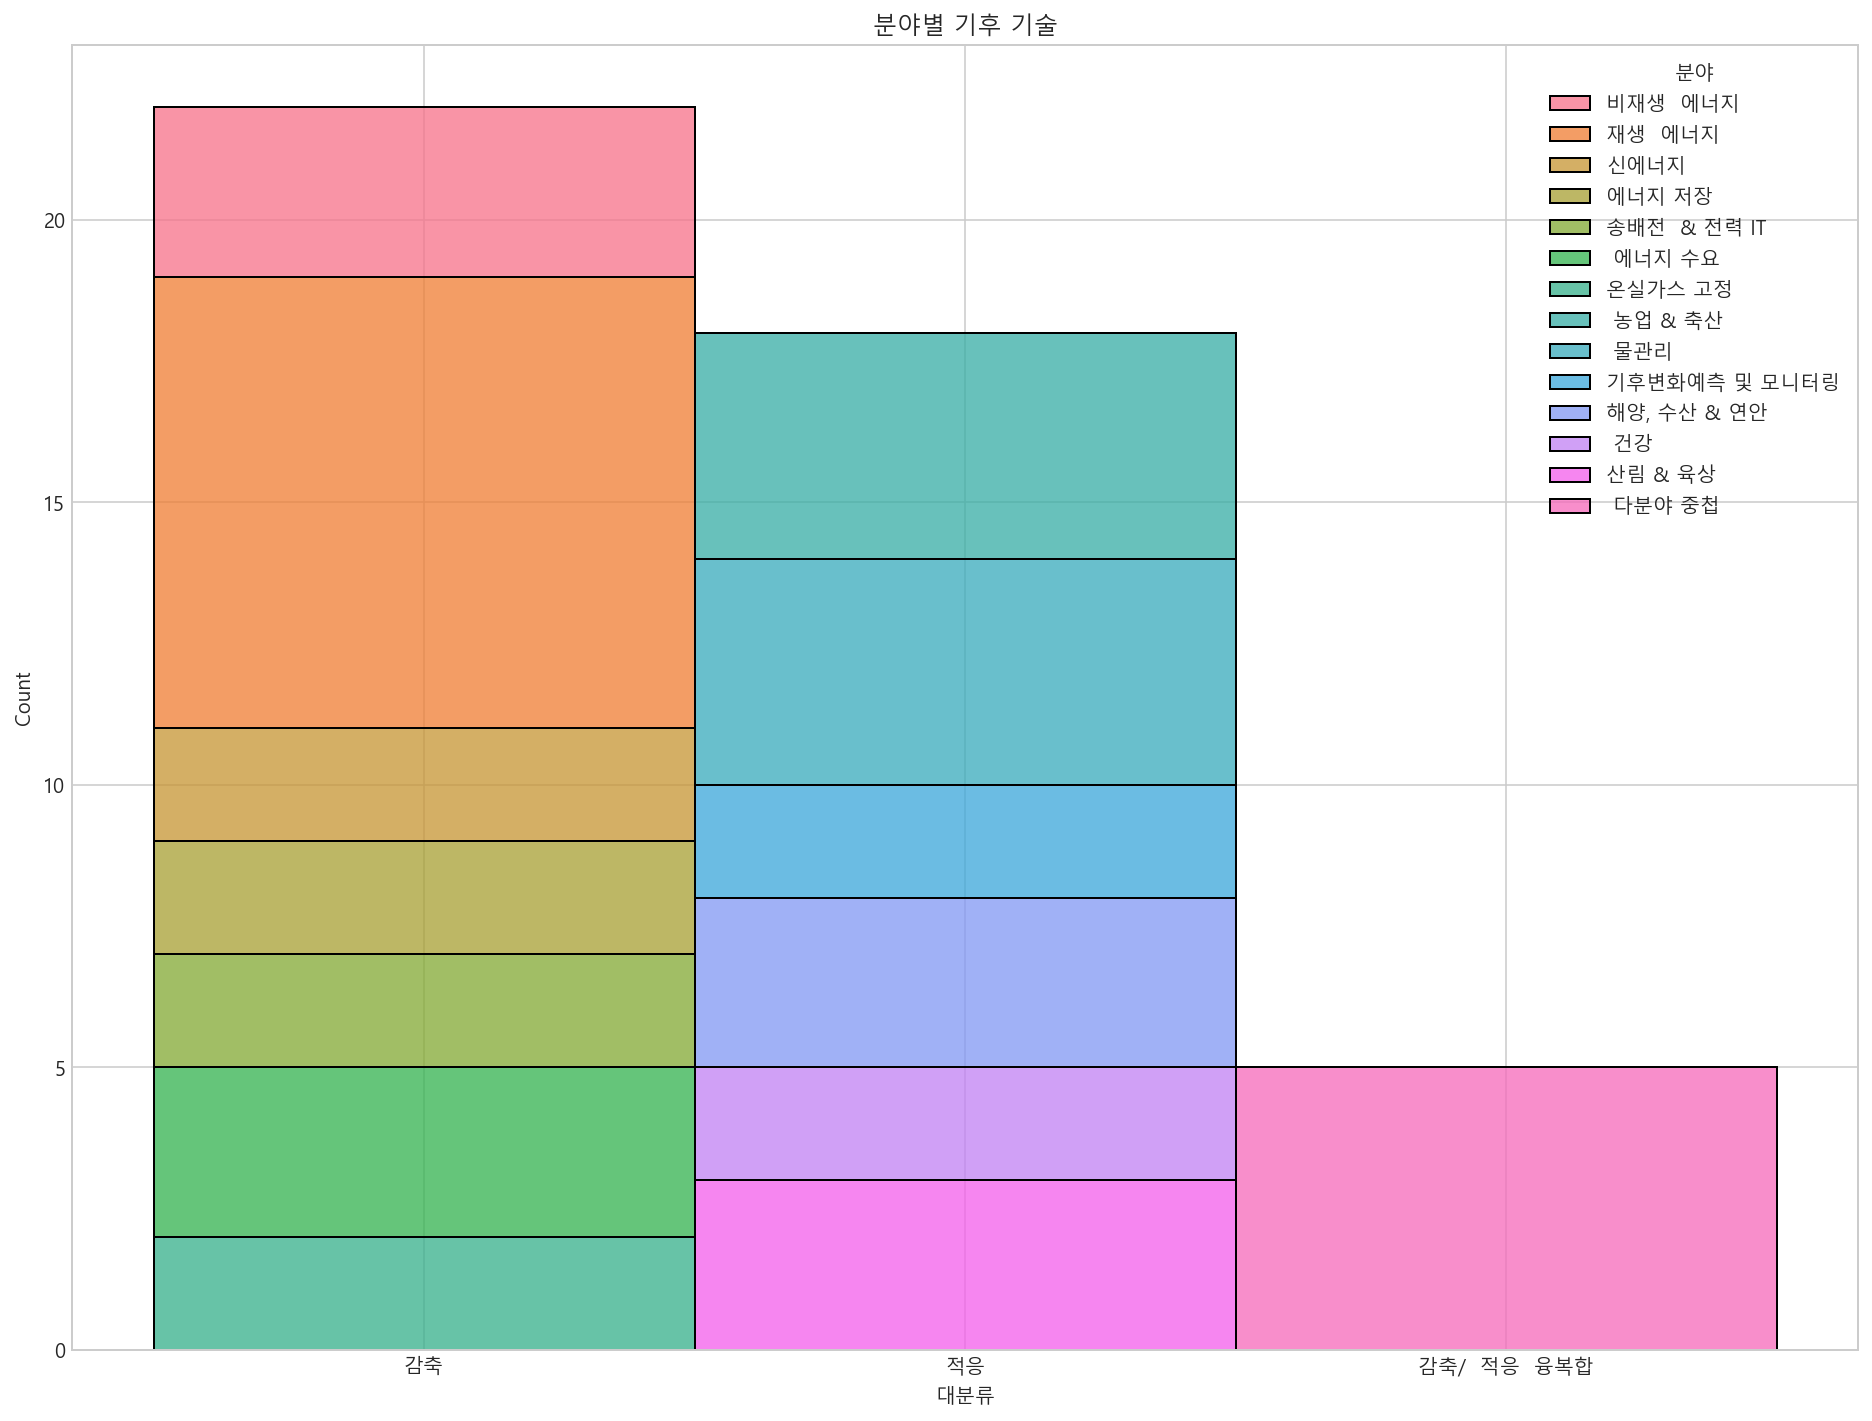

In [412]:
plt.figure(figsize=(16, 12))
_ = sns.histplot(data=sys_type, x="대분류", hue="분야", multiple="stack").set_title("분야별 기후 기술")

In [382]:
px.bar(sys_type, x="대분류", color="분야", title="기후 기술 분류별 분야")

In [383]:
px.bar(sys_type[sys_type["대분류"]=="감축"], x="분야", color="소분류", title="분야별 소분류 (감축)")

In [384]:
px.bar(sys_type[sys_type["대분류"]=="적응"], x="분야", color="소분류", title="분야별 소분류 (적응)")

## 2. 목표
해당 프로젝트의 목적은 기후기술과 관련하여 다양한 정보를 수집하고 시각화하는 것입니다.  

## 3. 사용 데이터 셋
[KOSIS 국가통계포털](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_01&vw_cd=MT_ZTITLE&list_id=N2_5&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=B4&path=%252FstatisticsList%252FstatisticsListIndex.do)에 등록되어있는 기후 기술 영역 데이터를 이용했습니다.  
  
생각보다 방대한 양의 데이터가 있어, 비슷한 분류끼리 나눠봤습니다.

---
- 기후기술 부문별·기업규모별 매출액 현황 기후기술 부문별·기업규모별 매출액 현황 (2012~2018) -> `sale1218`
- 기후기술 영역별 기관규모별 매출액 기후기술 영역별 기관규모별 매출액 (2019~2020) -> `sale1920`
- 기후기술 부문별·기업규모별 연구개발비 현황 기후기술 부문별·기업규모별 연구개발비 현황 (2012~2018) -> `rnd1218`
- 기후기술 영역별 기관규모별 연구개발비 기후기술 영역별 기관규모별 연구개발비 (2019~2020) -> `rnd1920`
---
- 기후기술 부문별·기업규모별 종사자수 현황 기후기술 부문별·기업규모별 종사자수 현황 (2012~2018) -> `nemp1218`
- 기후기술 영역별 기관규모별 종사자 수 기후기술 영역별 기관규모별 종사자 수 (2019~2020) -> `nemp1920`
- 기후기술 영역별 기관규모별 연구원 수 기후기술 영역별 기관규모별 연구원 수 (2019~2020) -> `nrsc1920`
---
- 기후기술 영역별 기관규모별 수출액 기후기술 영역별 기관규모별 수출액 (2019~2020) -> `per_sale1920`
- 기후기술 영역별 기술수명주기 단계 기후기술 영역별 기술수명주기 단계 (2019~2020) -> `life_cycle1920`
- 기후기술 영역별 기업 및 기관의 누적 특허 건수 기후기술 영역별 기업 및 기관의 누적 특허 건수 (2019~2020) -> `누적특허건수`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2019~2019) -> `기술이전실적2019`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2020~2020) -> `기술이전실적2020`
- 기후기술 영역별 해외진출지역(복수응답) 기후기술 영역별 해외진출지역(복수응답) (2019~2020) -> `해외진출지역`
- 기후기술 영역별 국내/해외 기술이전 방식 기후기술 영역별 국내/해외 기술이전 방식 (2019~2019) -> `기술이전방식2019`
- 기후기술 영역별 국내 기술이전 선호 항목(복수응답) 기후기술 영역별 국내 기술이전 선호 항목(복수응답) (2020~2020) -> `기술이전선호항목2020`
---
- 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) (2019~2020) -> `정책`
---

## 4. 구현

#### 라이브러리 로드

In [1]:
# For Scraping
import requests
from bs4 import BeautifulSoup as bs
# For data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
import matplotlib.pyplot as plt

In [2]:
# For convert plotly to iframe
import chart_studio
import chart_studio.tools as ct
import chart_studio.plotly as cp
# convert plotly to iframe
# ct.get_embed(cp.plot(fig, filename= , auto_open=Fasle))

In [3]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = "retina"

### 1. Data Load

In [5]:
# 기후기술 인력 관련
'''
- 기후기술 부문별·기업규모별 종사자수 현황 기후기술 부문별·기업규모별 종사자수 현황 (2012~2018) -> `nemp1218`
- 기후기술 영역별 기관규모별 종사자 수 기후기술 영역별 기관규모별 종사자 수 (2019~2020) -> `nemp1920`
- 기후기술 영역별 기관규모별 연구원 수 기후기술 영역별 기관규모별 연구원 수 (2019~2020) -> `nrsc1920`
'''
df_nemp1218 = pd.read_csv("data/nemp1218.csv", encoding="cp949")
df_nemp1920 = pd.read_csv("data/nemp1920.csv", encoding="cp949")
df_nrsc1920 = pd.read_csv("data/nrsc1920.csv", encoding="cp949")

In [116]:
# 기후기술 매출 & 개발 비용 관련
'''
- 기후기술 부문별·기업규모별 매출액 현황 기후기술 부문별·기업규모별 매출액 현황 (2012~2018) -> `sale1218`
- 기후기술 영역별 기관규모별 매출액 기후기술 영역별 기관규모별 매출액 (2019~2020) -> `sale1920`
- 기후기술 부문별·기업규모별 연구개발비 현황 기후기술 부문별·기업규모별 연구개발비 현황 (2012~2018) -> `rnd1218`
- 기후기술 영역별 기관규모별 연구개발비 기후기술 영역별 기관규모별 연구개발비 (2019~2020) -> `rnd1920`
'''
df_sale1218_corp = pd.read_csv("data/sale1218.csv", encoding="cp949")
df_rnd1218_corp = pd.read_csv("data/rnd1218.csv", encoding="cp949")
df_sale1920_inst = pd.read_csv("data/sale1920.csv", encoding="cp949")
df_rnd1920_inst = pd.read_csv("data/rnd1920.csv", encoding="cp949")

In [1]:
# 기후기술 수출 관련
'''
- 기후기술 영역별 기관규모별 수출액 기후기술 영역별 기관규모별 수출액 (2019~2020) -> `per_sale1920`
- 기후기술 영역별 기술수명주기 단계 기후기술 영역별 기술수명주기 단계 (2019~2020) -> `life_cycle1920`
- 기후기술 영역별 기업 및 기관의 누적 특허 건수 기후기술 영역별 기업 및 기관의 누적 특허 건수 (2019~2020) -> `누적특허건수`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2019~2019) -> `기술이전실적2019`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2020~2020) -> `기술이전실적2020`
- 기후기술 영역별 해외진출지역(복수응답) 기후기술 영역별 해외진출지역(복수응답) (2019~2020) -> `해외진출지역`
- 기후기술 영역별 국내/해외 기술이전 방식 기후기술 영역별 국내/해외 기술이전 방식 (2019~2019) -> `기술이전방식2019`
- 기후기술 영역별 국내 기술이전 선호 항목(복수응답) 기후기술 영역별 국내 기술이전 선호 항목(복수응답) (2020~2020) -> `기술이전선호항목2020`
'''
# 기후기술 지원 정부 정책
'''
- 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) (2019~2020) -> `정책`
'''
pass

### 2. Data Preprocessing & EDA

#### 1. 기후기술 인력
- `df_nemp1218`: 2012 ~ 2018년, 종사자 현황
- `df_nemp1920`: 2019 ~ 2020년, 종사자 현황
- `df_nrsc1920`: 2019 ~ 2020년, 연구원 현황

In [6]:
print(f"df_nemp1218: {df_nemp1218.shape}\ndf_nemp1920: {df_nemp1920.shape}\ndf_nrsc1920: {df_nrsc1920.shape}")

df_nemp1218: (490, 5)
df_nemp1920: (210, 5)
df_nrsc1920: (209, 5)


##### 1. 초기 데이터 맞추기
기후기술 인력과 관련된 데이터의 컬럼명과 순서를 맞춰줬습니다.  
매출액의 경우, 기업 규모와 연관 지을 수 있는 부분이라 기업 규모로 일치 시켰습니다.

In [8]:
# 컬럼명 변경
df_nemp1218.columns = ["기업규모", "대분류", "분야", "연도", "종사자"]

In [9]:
df_nemp1218.sample(10)

,기업규모,대분류,분야,연도,종사자
110,대기업,감축,소계,2017,69988
321,중소기업,감축,재생에너지,2018,15162
175,대기업,적응,물,2012,64
311,중소기업,감축,비재생에너지,2015,1327
50,전체,감축,에너지수요,2013,80214
57,전체,감축,온실가스 고정,2013,338
101,대기업,합계,소계,2015,71664
296,중소기업,합계,소계,2014,46154
200,중견기업,합계,소계,2016,68485
100,대기업,합계,소계,2014,70368


In [10]:
# 컬럼명 변경
df_nemp1920.columns = ["대분류", "분야", "기업규모", "연도", "종사자"]
df_nemp1920 = df_nemp1920[["기업규모", "대분류", "분야", "연도", "종사자"]]

In [11]:
df_nemp1920.sample(10)

,기업규모,대분류,분야,연도,종사자
46,100억 원 이상 600억 원 미만,감축,재생에너지,2019 p),3936
110,"1,000억 원 이상 2,000억 원 미만",감축,온실가스 고정,2020,23
186,100억 원 미만,융복합,소계,2019 p),458
6,"1,000억 원 이상 2,000억 원 미만",합계,소계,2020,14033
81,100억 원 미만,감축,송배전&전력IT,2020,3675
204,100억 원 이상 600억 원 미만,융복합,감축 및 적응 융복합,2019 p),220
85,100억 원 이상 600억 원 미만,감축,송배전&전력IT,2019 p),1177
49,"2,000억 원 이상",감축,재생에너지,2020,11513
19,"1,000억 원 이상 2,000억 원 미만",감축,소계,2020,11663
47,"600억 원 이상 2,000억 원 미만",감축,재생에너지,2019 p),5772


In [12]:
# 컬럼명 변경
df_nrsc1920.columns = ["대분류", "분야", "기업규모", "연도", "종사자"]
df_nrsc1920 = df_nrsc1920[["기업규모", "대분류", "분야", "연도", "종사자"]]

In [13]:
df_nrsc1920.sample(10)

,기업규모,대분류,분야,연도,종사자
130,전체,적응,농업&축산,2020,1395
183,전체,융복합,소계,2019 p),1582
1,전체,합계,소계,2020,58312
125,"2,000억 원 이상",적응,소계,2019 p),548
39,전체,감축,재생에너지,2019 p),9044
51,기타(공공기관),감축,재생에너지,2020,983
120,100억 원 이상 500억 원 미만,적응,소계,2020,1200
52,전체,감축,신에너지,2019 p),1296
5,"500억원 이상 1,000억 원 미만",합계,소계,2020,2620
97,"1,000억 원 이상 2,000억 원 미만",감축,에너지수요,2020,1698


##### 2. 데이터 확인
결측치, 데이터 타입 등 확인

In [47]:
df_nemp1218.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    490 non-null    object
 1   대분류     490 non-null    object
 2   분야      490 non-null    object
 3   연도      490 non-null    int64 
 4   종사자     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.3+ KB


In [44]:
df_nemp1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    210 non-null    object
 1   대분류     210 non-null    object
 2   분야      210 non-null    object
 3   연도      210 non-null    object
 4   종사자     210 non-null    object
dtypes: object(5)
memory usage: 8.3+ KB


In [45]:
df_nrsc1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    209 non-null    object
 1   대분류     209 non-null    object
 2   분야      209 non-null    object
 3   연도      209 non-null    object
 4   종사자     209 non-null    object
dtypes: object(5)
memory usage: 8.3+ KB


`df_nemp1218`(2012~2018년도 종사자) 데이터에서는 `종사자`가 `object` 타입으로 들어있고,  
`df_nemp1920`(2019~2020년도 종사자)와 `df_nrsc1920`(2019~2020년도 연구원)에서는 `연도`와 `종사자`가 `object` 타입으로 들어있습니다.  
해당 부분의 타입을 통일해줘야할꺼 같습니다.


In [14]:
df_nemp1218["종사자"] = pd.to_numeric(df_nemp1218["종사자"], errors="coerce")
df_nemp1920["종사자"] = pd.to_numeric(df_nemp1920["종사자"], errors="coerce")
df_nrsc1920["종사자"] = pd.to_numeric(df_nrsc1920["종사자"], errors="coerce")

In [15]:
set(df_nemp1920["연도"]), set(df_nrsc1920["연도"])

({'2019 p)', '2020'}, {'2019 p)', '2020'})

연도 컬럼의 경우, `2019 p)`식으로 문자가 존재합니다.

In [16]:
df_nemp1920["연도"] = df_nemp1920["연도"].str.strip("p)").astype(int)
df_nrsc1920["연도"] = df_nrsc1920["연도"].str.strip("p)").astype(int)

In [100]:
df_nemp1218.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업규모    490 non-null    object 
 1   대분류     490 non-null    object 
 2   분야      490 non-null    object 
 3   연도      490 non-null    int64  
 4   종사자     487 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.3+ KB


In [101]:
df_nemp1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업규모    210 non-null    object 
 1   대분류     210 non-null    object 
 2   분야      210 non-null    object 
 3   연도      210 non-null    int32  
 4   종사자     199 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 7.5+ KB


In [102]:
df_nrsc1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업규모    209 non-null    object 
 1   대분류     209 non-null    object 
 2   분야      209 non-null    object 
 3   연도      209 non-null    int32  
 4   종사자     199 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 7.5+ KB


데이터 타입이 통일된 모습을 확인할 수 있습니다.

In [18]:
df_nemp1218 = df_nemp1218.fillna(0)

In [20]:
df_nemp1920 = df_nemp1920.fillna(0)

In [22]:
df_nrsc1920 = df_nrsc1920.fillna(0)

결측치가 해당하는 컬럼이 종사자이므로, 모두 0으로 대체해줍니다.

##### 3. 필요없는 행 버리기
기업규모=전체, 대분류=합계, 분야=소계인 행들은, 특정 섹터를 종합한 내용이므로 버려줬습니다.

In [23]:
df_nemp1218 = df_nemp1218.drop(df_nemp1218[(df_nemp1218["기업규모"]=="전체") | (df_nemp1218['대분류']=="합계") | (df_nemp1218["분야"]=="소계")].index).reset_index(drop=True)
df_nemp1218.shape

(280, 5)

In [24]:
df_nemp1920 = df_nemp1920.drop(df_nemp1920[(df_nemp1920["기업규모"]=="전체") | (df_nemp1920['대분류']=="합계") | (df_nemp1920["분야"]=="소계")].index).reset_index(drop=True)
df_nemp1920.shape

(134, 5)

In [25]:
df_nrsc1920 = df_nrsc1920.drop(df_nrsc1920[(df_nrsc1920["기업규모"]=="전체") | (df_nrsc1920['대분류']=="합계") | (df_nrsc1920["분야"]=="소계")].index).reset_index(drop=True)
df_nrsc1920.shape

(133, 5)

##### 의문점) 종사자와 연구원의 차이?
2012년도부터 2018년도까지는 **종사자**라는 명칭을 사용하고 있지만, 2019년도부터 2020년도 데이터에서는 **종사자**와 **연구원**으로 분리되어 있습니다.  
제가가진 지식선에서는, 종사자는 해당 분야에 종사하는 모든 사람들이고, 연구원도 종사자에 포함되어있는거라고 생각했습니다.  
인력의 수가 1~2년 사이에 큰 변화가 없다면, 종사자와 연구자를 종사자로 통일해 사용해도 될꺼 같다는 생각이 들어 이를 확인해봤습니다.

In [26]:
df_nemp1218["종사자"].sum(), df_nemp1920["종사자"].sum(), df_nrsc1920["종사자"].sum()

(1350109.0, 351264.0, 114833.0)

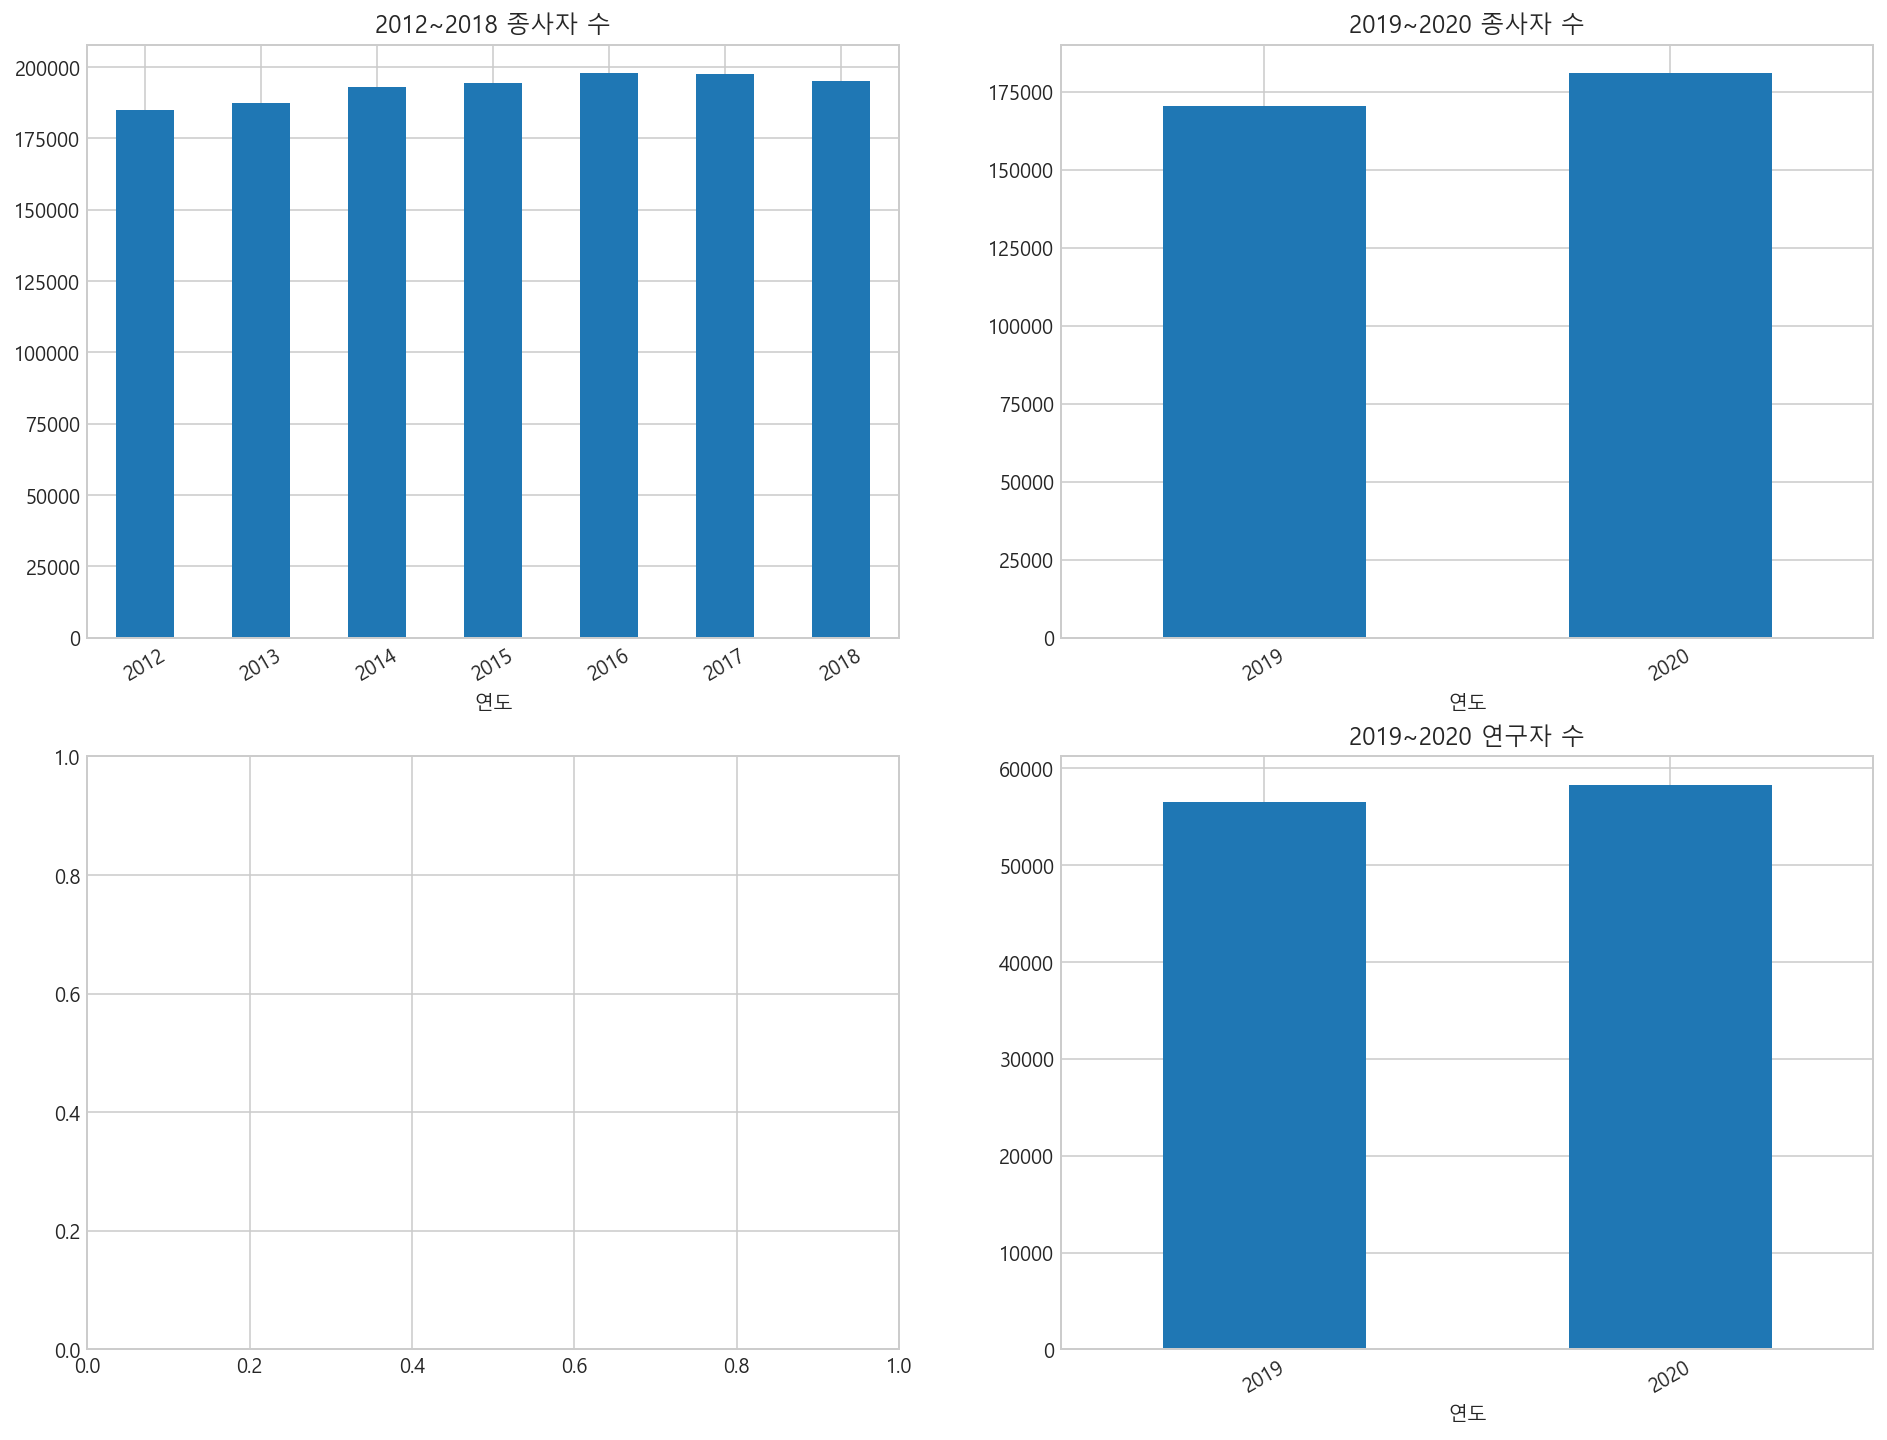

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
_ = df_nemp1218.groupby("연도")["종사자"].sum().plot(kind="bar", rot=30, ax=axes[0,0], title="2012~2018 종사자 수")
_ = df_nemp1920.groupby("연도")["종사자"].sum().plot(kind="bar", rot=30, ax=axes[0,1], title="2019~2020 종사자 수")
_ = df_nrsc1920.groupby("연도")["종사자"].sum().plot(kind="bar", rot=30, ax=axes[1,1], title="2019~2020 연구자 수")

In [28]:
fig = make_subplots(rows=2, cols=2, start_cell="top-left", shared_xaxes=True, shared_yaxes=True, subplot_titles=["2012~2018 종사자 수", "2019~2020 종사자 수", " ", "2019~2020 연구자 수"])

fig.add_bar(x=df_nemp1218["연도"], y=df_nemp1218["종사자"], name="2012~2018 종사자 수", row=1, col=1)
fig.add_bar(x=df_nemp1920["연도"], y=df_nemp1920["종사자"], name="2019~2020 종사자 수", row=1, col=2)
fig.add_bar(x=df_nrsc1920["연도"], y=df_nrsc1920["종사자"], name="2019~2020 연구자 수", row=2, col=2)

fig.update_layout(title="<b>연도별 종사자 및 연구자 수</b>")
fig.show()

2012~2018 종사자 수와, 2019~2020 연구자/종사자 수를보면, 종사자와 연구자는 별개의 데이터라는걸 알 수 있었습니다.

##### 4. 데이터 합치기
기관과 기업은 다르지만, 기후기술 관련 기술 소유 여부와, 종사자/연구원의 수에 대한 데이터이므로 같은 개념으로 사용했습니다.  
분류 기준은 [통계청](http://kostat.go.kr/understand/info/info_qst/1/index.board?bmode=read&bSeq=&aSeq=414440&pageNo=1&rowNum=15&navCount=10&currPg=&searchInfo=&sTarget=title&sTxt=)과 기관/기업 분류를 참고했습니다. 기관은 기업의 `연구소 등 비영리기관`으로 묶었습니다.

`df_nemp1920`과 `df_nrsc1920`은 기후기술 영역별 기관규모별 종사자와 연구자 수에 대한 데이터이므로 쉽게 합칠 수 있엇습니다.

In [40]:
df_nemp1920["연구자"] = df_nrsc1920["종사자"]

In [32]:
df_nemp1218["기업규모"].value_counts()

대기업            70
중견기업           70
중소기업           70
연구소 등 비영리기관    70
Name: 기업규모, dtype: int64

In [44]:
df_nemp1920["기업규모"].value_counts()

100억 원 미만                  24
2,000억 원 이상                24
기타(공공기관)                   24
100억 원 이상 500억 원 미만        14
500억 원 이상  1,000억 원 미만     14
1,000억 원 이상 2,000억 원 미만    14
100억 원 이상 600억 원 미만        10
600억 원 이상 2,000억 원 미만      10
Name: 기업규모, dtype: int64

In [49]:
df_nemp1920["기업규모"] = "연구소 등 비영리기관"

In [96]:
df_nemp = pd.concat([df_nemp1218, df_nemp1920])
df_nemp = df_nemp.replace("감축 및 적응 융복합", "융복합").copy()

In [99]:
df_nemp.sample(7)

,기업규모,대분류,분야,연도,종사자,연구자
65,대기업,융복합,융복합,2014,1192.0,NaN
171,중소기업,감축,송배전 및 에너지관리,2015,1833.0,NaN
45,대기업,감축,온실가스 고정,2015,17.0,NaN
91,중견기업,감축,에너지저장,2012,3387.0,NaN
82,중견기업,감축,재생에너지,2017,17277.0,NaN
5,대기업,감축,비재생에너지,2017,1854.0,NaN
103,연구소 등 비영리기관,적응,예측?모니터링,2020,0.0,3.0


##### 5. 시각화

In [134]:
# 기후기술 분류별 종사자 수
fig = px.bar(data_frame=df_nemp, x="연도", y="종사자", facet_col="대분류", color="기업규모", title="연도별 대분류별 종사자 수")
fig.show()

In [135]:
# 기후기술 분류별 종사자 수
fig = px.bar(data_frame=df_nemp, x="연도", y="종사자", facet_col="기업규모", color="대분류", title="연도별 기업규모별 종사자 수")
fig.show()

In [152]:
df_nemp.to_csv("data/nemp.csv", index=False)

#### 2. 매출액과 연구개발비
##### 1. 초기 데이터 맞추기

In [93]:
print(f"df_sale1218_corp: {df_sale1218_corp.shape}\ndf_rnd1218_corp: {df_rnd1218_corp.shape}\ndf_sale1920_inst: {df_sale1920_inst.shape}\ndf_rnd1920_inst: {df_rnd1920_inst.shape}")

df_sale1218_corp: (490, 5)
df_rnd1218_corp: (490, 5)
df_sale1920_inst: (210, 5)
df_rnd1920_inst: (210, 5)


##### 기업 매출액/연구개발비

In [94]:
# 2012 ~ 2018 기업별 매출/연구투자
df_corp_sr = pd.concat([df_sale1218_corp, df_rnd1218_corp["데이터"]], axis=1)
df_corp_sr.columns = ["대분류", "소분류", "기업규모", "연도", "매출액", "연구개발비"]
df_corp_sr = df_corp_sr[["기업규모", "대분류", "소분류", "연도", "매출액", "연구개발비"]]
df_corp_sr = df_corp_sr.replace("감축 및 적응 융복합", "융복합").copy()

In [180]:
df_corp_sr.sample(5)

,기업규모,대분류,소분류,연도,매출액,연구개발비
116,대기업,감축,재생에너지,2016,25626224,11320
89,중견기업,감축,비재생에너지,2017,30891,1013
230,중견기업,감축,송배전 및 에너지관리,2018,3783737,7925
226,중견기업,감축,송배전 및 에너지관리,2014,4540109,9509
293,대기업,감축,온실가스 고정,2018,4513872,-


##### 기관 매출액/연구개발비

In [117]:
df_inst_sr = pd.concat([df_sale1920_inst, df_rnd1920_inst["데이터"]], axis=1)
df_inst_sr.columns = ["대분류", "소분류", "기관규모", "연도", "매출액", "연구개발비"]
df_inst_sr = df_inst_sr[["기관규모", "대분류", "소분류", "연도", "매출액", "연구개발비"]]

In [118]:
df_inst_sr.sample(5)

,기관규모,대분류,소분류,연도,매출액,연구개발비
83,"500억 원 이상 1,000억 원 미만",감축,송배전&전력IT,2020,750664,217448
141,기타(공공기관),적응,농업&축산,2019 p),732521,23239
142,기타(공공기관),적응,농업&축산,2020,74126,6600
178,100억 원 미만,적응,산림육상,2020,33103,2209632
200,100억 원 미만,융복합,감축 및 적응 융복합,2020,139878,172400


##### 2. 데이터 확인

결측치 및 데이터 타입 확인

In [186]:
df_corp_sr.isnull().sum()

기업규모     0
대분류      0
소분류      0
연도       0
매출액      0
연구개발비    0
dtype: int64

In [188]:
df_corp_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    490 non-null    object
 1   대분류     490 non-null    object
 2   소분류     490 non-null    object
 3   연도      490 non-null    int64 
 4   매출액     490 non-null    object
 5   연구개발비   490 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.1+ KB


In [187]:
df_inst_sr.isnull().sum()

기관규모     0
대분류      0
소분류      0
연도       0
매출액      0
연구개발비    0
dtype: int64

In [189]:
df_inst_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기관규모    210 non-null    object
 1   대분류     210 non-null    object
 2   소분류     210 non-null    object
 3   연도      210 non-null    object
 4   매출액     210 non-null    object
 5   연구개발비   210 non-null    object
dtypes: object(6)
memory usage: 10.0+ KB


매출액과 연구개발비의 데이터 타입을 맞춰줍니다.

In [119]:
df_corp_sr["매출액"] = pd.to_numeric(df_corp_sr["매출액"], errors="coerce")
df_corp_sr["연구개발비"] = pd.to_numeric(df_corp_sr["연구개발비"], errors="coerce")
df_inst_sr["매출액"] = pd.to_numeric(df_inst_sr["매출액"], errors="coerce")
df_inst_sr["연구개발비"] = pd.to_numeric(df_inst_sr["연구개발비"], errors="coerce")

In [120]:
df_inst_sr["연도"] = df_inst_sr["연도"].str.split("p", expand=True)[0]

##### 3. 필요없는 행버리기
기업(기관)규모 = 전체, 대분류 = 합계, 소분류 = 소계인 행들은 필요없는 행이므로 버려줍니다.

In [121]:
df_corp_sr = df_corp_sr.drop(df_corp_sr[(df_corp_sr["기업규모"]=="전체") | (df_corp_sr["대분류"]=="합계") | (df_corp_sr["소분류"]=="소계")].index).reset_index(drop=True)
df_corp_sr.shape

(280, 6)

In [122]:
df_inst_sr = df_inst_sr.drop(df_inst_sr[(df_inst_sr["기관규모"]=="전체") | (df_inst_sr["대분류"]=="합계") | (df_inst_sr["소분류"]=="소계")].index).reset_index(drop=True)
df_inst_sr.shape

(134, 6)

기관 규모의 인덱스를 정리합니다.

In [123]:
df_inst_sr["기관규모"].value_counts()

100억 원 미만                  24
2,000억 원 이상                24
기타(공공기관)                   24
100억 원 이상 500억 원 미만        14
500억 원 이상 1,000억 원 미만      14
1,000억 원 이상 2,000억 원 미만    14
100억 원 이상 600억 원 미만        10
600억 원 이상 2,000억 원 미만      10
Name: 기관규모, dtype: int64

In [124]:
def parshing_text(t):
    _ = t.split(" ")
    if len(_)==1:
        return "기타(공공기관)"
    elif len(_)==3:
        return "~"+_[0]
    else:
        return _[0]+"~"+_[3]

In [125]:
df_inst_sr["기관규모"] = df_inst_sr["기관규모"].apply(parshing_text)

~2,000억 범주는 1,000억~2,000억로 전환했습니다.

In [127]:
df_inst_sr["기관규모"] = df_inst_sr["기관규모"].replace("~2,000억", "1,000억~2,000억")

In [129]:
df_inst_sr["기관규모"].value_counts()

1,000억~2,000억    38
~100억            24
기타(공공기관)         24
100억~500억        14
500억~1,000억      14
100억~600억        10
600억~2,000억      10
Name: 기관규모, dtype: int64

전처리된 데이터를 저장합니다.

In [130]:
df_corp_sr.to_csv("data/corp_sr.csv", index=False)
df_inst_sr.to_csv("data/inst_sr.csv", index=False)

전처리된 데이터를 불러옵니다.

In [131]:
df_corp_sr = pd.read_csv("data/corp_sr.csv")
df_inst_sr = pd.read_csv("data/inst_sr.csv")

##### 4. 시각화
##### 기업

In [134]:
# 대기업 연간 매출액
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="대기업"], x="연도", y="매출액", facet_col="대분류", title="대분류 별 대기업 매출액")
fig.show()

In [135]:
# 대기업 연간 연구개발비
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="대기업"], x="연도", y="연구개발비", facet_col="대분류", title="대분류 별 대기업 연구개발비")
fig.show()

---

In [136]:
# 중견기업 연간 매출액
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="중견기업"], x="연도", y="매출액", facet_col="대분류", title="대분류 별 중견기업 매출액")
fig.show()

In [137]:
# 중견기업 연간 연구개발비
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="중견기업"], x="연도", y="연구개발비", facet_col="대분류", title="대분류 별 중견기업 연구개발비")
fig.show()

---

In [138]:
# 중소기업 연간 매출액
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="중소기업"], x="연도", y="매출액", facet_col="대분류", title="대분류 별 중소기업 매출액")
fig.show()

In [139]:
# 중소기업 연구개발비
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="중소기업"], x="연도", y="연구개발비", facet_col="대분류", title="대분류 별 중소기업 연구개발비")
fig.show()

---

In [140]:
# 연구소 등 비영리기관 매출액
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="연구소 등 비영리기관"], x="연도", y="매출액", facet_col="대분류", title="대분류 별 연구소 등 비영리기관 매출액")
fig.show()

In [144]:
# 대분류 별 연구소 등 비영리기관 연구개발비
fig = px.bar(data_frame=df_corp_sr[df_corp_sr["기업규모"]=="연구소 등 비영리기관"], x="연도", y="연구개발비", facet_col="대분류", title="대분류 별 연구소 등 비영리기관 연구개발비")
fig.show()

---

##### 기관

In [142]:
df_inst_sr["기관규모"].value_counts()

1,000억~2,000억    38
~100억            24
기타(공공기관)         24
100억~500억        14
500억~1,000억      14
100억~600억        10
600억~2,000억      10
Name: 기관규모, dtype: int64

In [143]:
df_inst_sr.sample(5)

,기관규모,대분류,소분류,연도,매출액,연구개발비
99,~100억,적응,예측?모니터링,2020,26758.0,1653836.0
60,100억~600억,감축,에너지수요,2019,3510682.0,1500.0
101,"500억~1,000억",적응,예측?모니터링,2020,NaN,80868.0
49,100억~600억,감축,송배전&전력IT,2019,455301.0,50559.0
35,100억~500억,감축,에너지저장,2020,652848.0,53476.0


In [145]:
# 100억 미만
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="~100억"], x="연도", y="연구개발비", facet_col="대분류", title="100억 미만 기관 연구개발비")
fig.show()

---

In [146]:
# 100억~500억
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="100억~500억"], x="연도", y="연구개발비", facet_col="대분류", title="100억~500억 기관 연구개발비")
fig.show()

---

In [148]:
# 100억~600억
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="100억~600억"], x="연도", y="연구개발비", facet_col="대분류", title="100억~600억 기관 연구개발비")
fig.show()

---

In [149]:
# 500억~1,000억
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="500억~1,000억"], x="연도", y="연구개발비", facet_col="대분류", title="500억~1,000억 기관 연구개발비")
fig.show()

---

In [151]:
# 1,000억~2,000억
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="1,000억~2,000억"], x="연도", y="연구개발비", facet_col="대분류", title="1,000억~2,000억 미만 기관 연구개발비")
fig.show()

---

In [152]:
# 600억~2,000억
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="600억~2,000억"], x="연도", y="연구개발비", facet_col="대분류", title="600억~2,000억 기관 연구개발비")
fig.show()

---

In [153]:
# 기타(공공기관)
fig = px.bar(data_frame=df_inst_sr[df_inst_sr["기관규모"]=="기타(공공기관)"], x="연도", y="연구개발비", facet_col="대분류", title="기타(공공기관) 연구개발비")
fig.show()

---

## 5. 결론 및 한계

기술 변경을 생각하지 못함  
기업과 기관의 분류